# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score


In [49]:
base = pd.read_csv('vars_dummy.csv')
base.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,tipo_renda_Student,tipo_renda_Working,educacao_Higher education,educacao_Incomplete higher,educacao_Lower secondary,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow
0,0,58.832877,3.106849,1,0,0,0,2.0,False,True,...,False,True,False,False,False,True,True,False,False,False
1,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,False,False,True,False,False,True,False
2,0,52.356164,8.358904,1,0,1,1,1.0,False,False,...,False,False,False,False,False,True,False,False,True,False
3,0,46.224658,2.106849,1,1,1,1,2.0,False,True,...,False,True,True,False,False,False,True,False,False,False
4,0,29.230137,3.021918,1,0,0,0,2.0,False,False,...,False,True,False,True,False,False,True,False,False,False


In [50]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  bool   
 9   sexo_M                                  16650 non-null  bool   
 10  posse_de_veiculo_Y                      16650 non-null  bo

In [51]:
# Separando as variaveis explicativas da target
y = base['mau']
y.replace({True: 1, False: 0}, inplace=True)

X = base.drop('mau', axis=1)
y.value_counts()

mau
0    16260
1      390
Name: count, dtype: int64

In [52]:
# Definição da proporção de teste e treinamento
X_treino, X_teste, y_treino, y_teste  = train_test_split(X, y, test_size=0.3, random_state=100)


#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [53]:
# 1)
clf = DecisionTreeClassifier(max_depth=2, random_state=100)
# 2)
clf.fit(X_treino, y_treino)


DecisionTreeClassifier(max_depth=2, random_state=100)

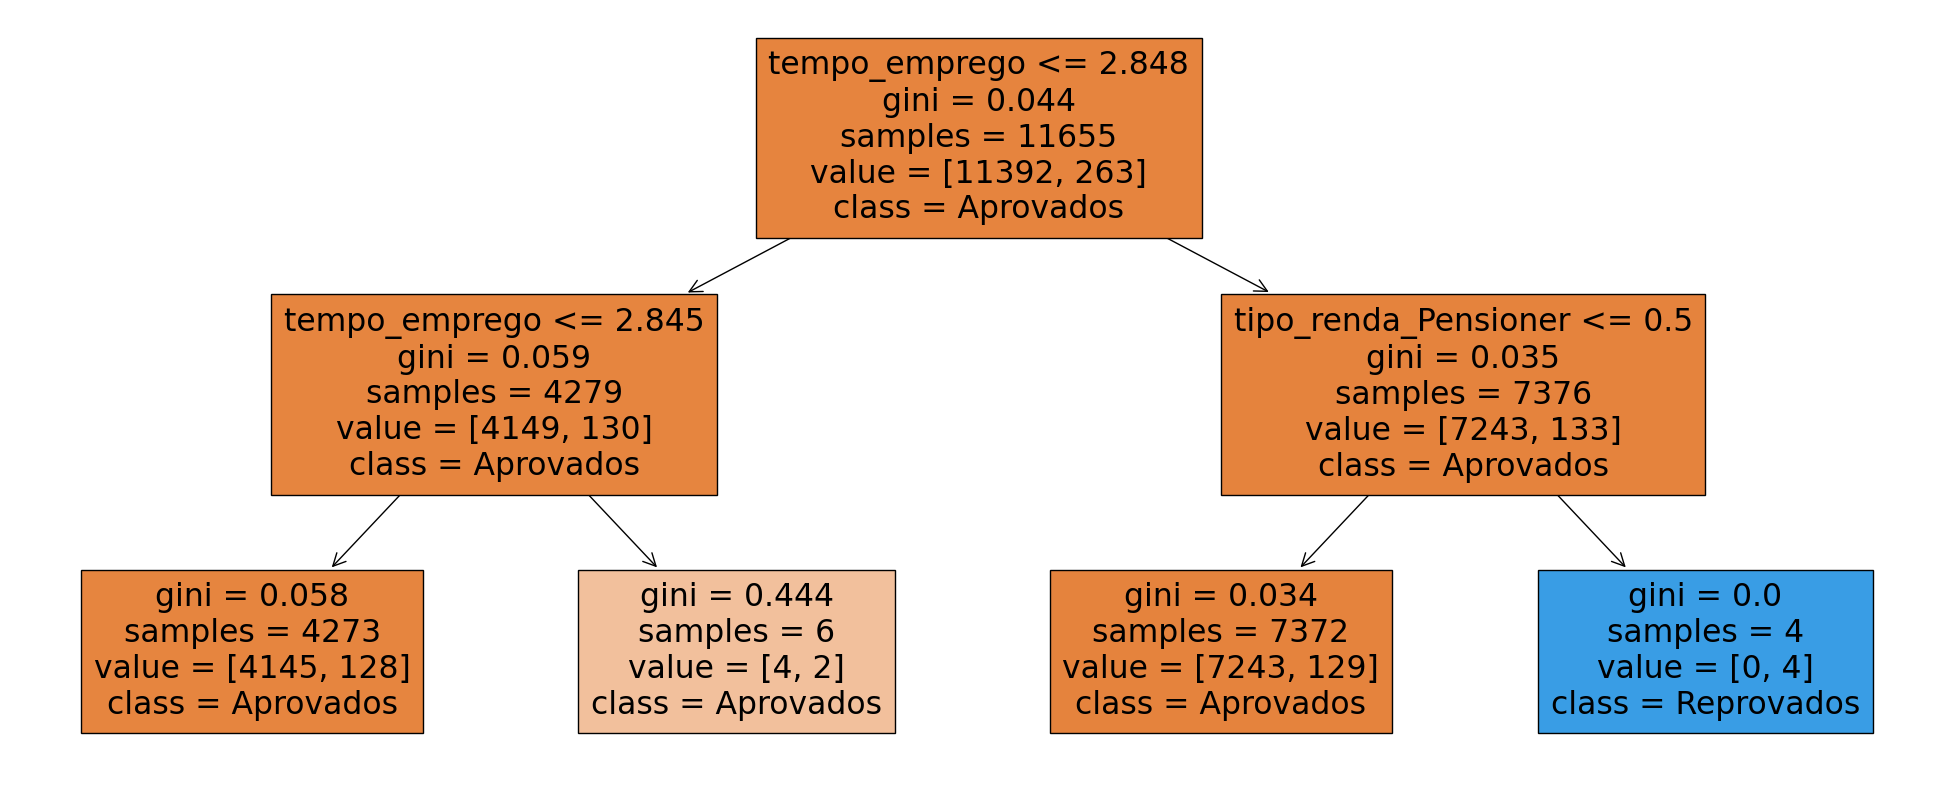

In [54]:
# 3) Visualização da árvore
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=list(X_treino.columns));

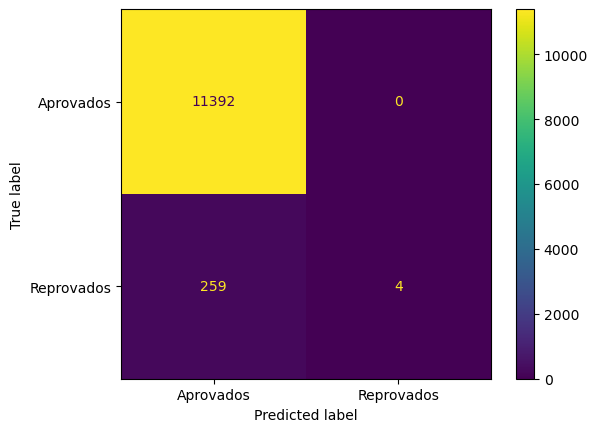

In [56]:
# 4)
ConfusionMatrixDisplay.from_estimator(clf, X_treino, y_treino, display_labels=['Aprovados', 'Reprovados'])

In [57]:
# 5) Acurácia
predict = clf.predict(X_treino)
accuracy_score(y_treino, predict)

0.9777777777777777

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [60]:
# 1)
clf = DecisionTreeClassifier(max_depth=2, random_state=100)
clf = clf.fit(X_teste,y_teste)


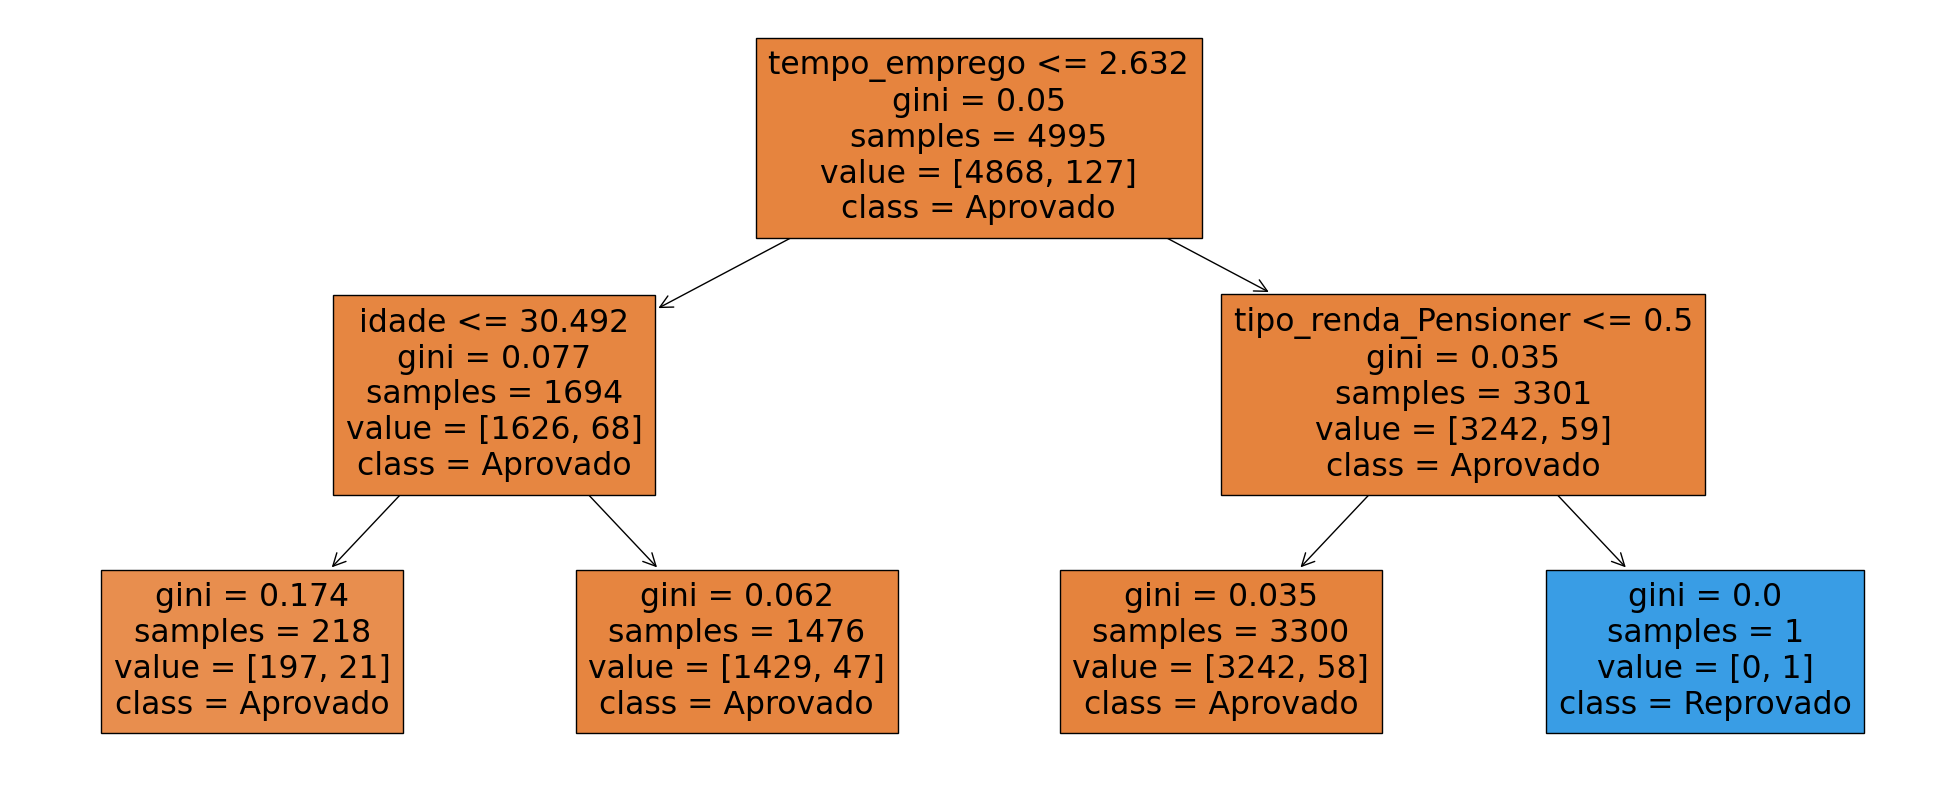

In [61]:
plt.figure(figsize=[25,10])
plot_tree(clf,
         filled=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=list(X_teste.columns));

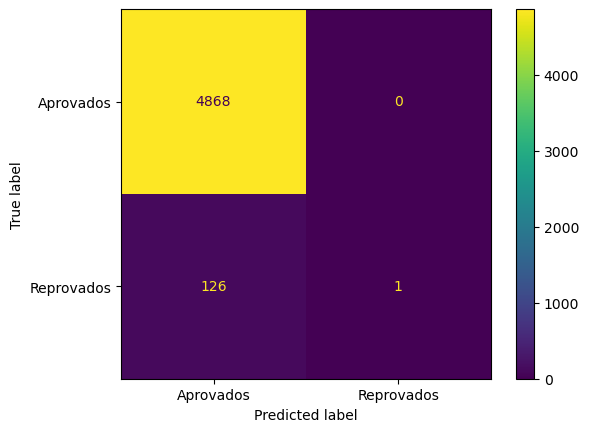

In [62]:
# 2)
ConfusionMatrixDisplay.from_estimator(clf, X_teste, y_teste, display_labels=['Aprovados', 'Reprovados'])


In [63]:
# 3)

# Acurácia da base de teste
predict = clf.predict(X_teste)
accuracy_score(y_teste, predict)


0.9747747747747748

In [69]:
# Comparando acurácia da base de treino e teste
clf.score(X_treino, y_treino), clf.score(X_teste, y_teste)

(0.9794079794079794, 0.9727727727727727)

In [65]:
# 4) Treinando nova árvore de decisão 
clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_treino,y_treino)

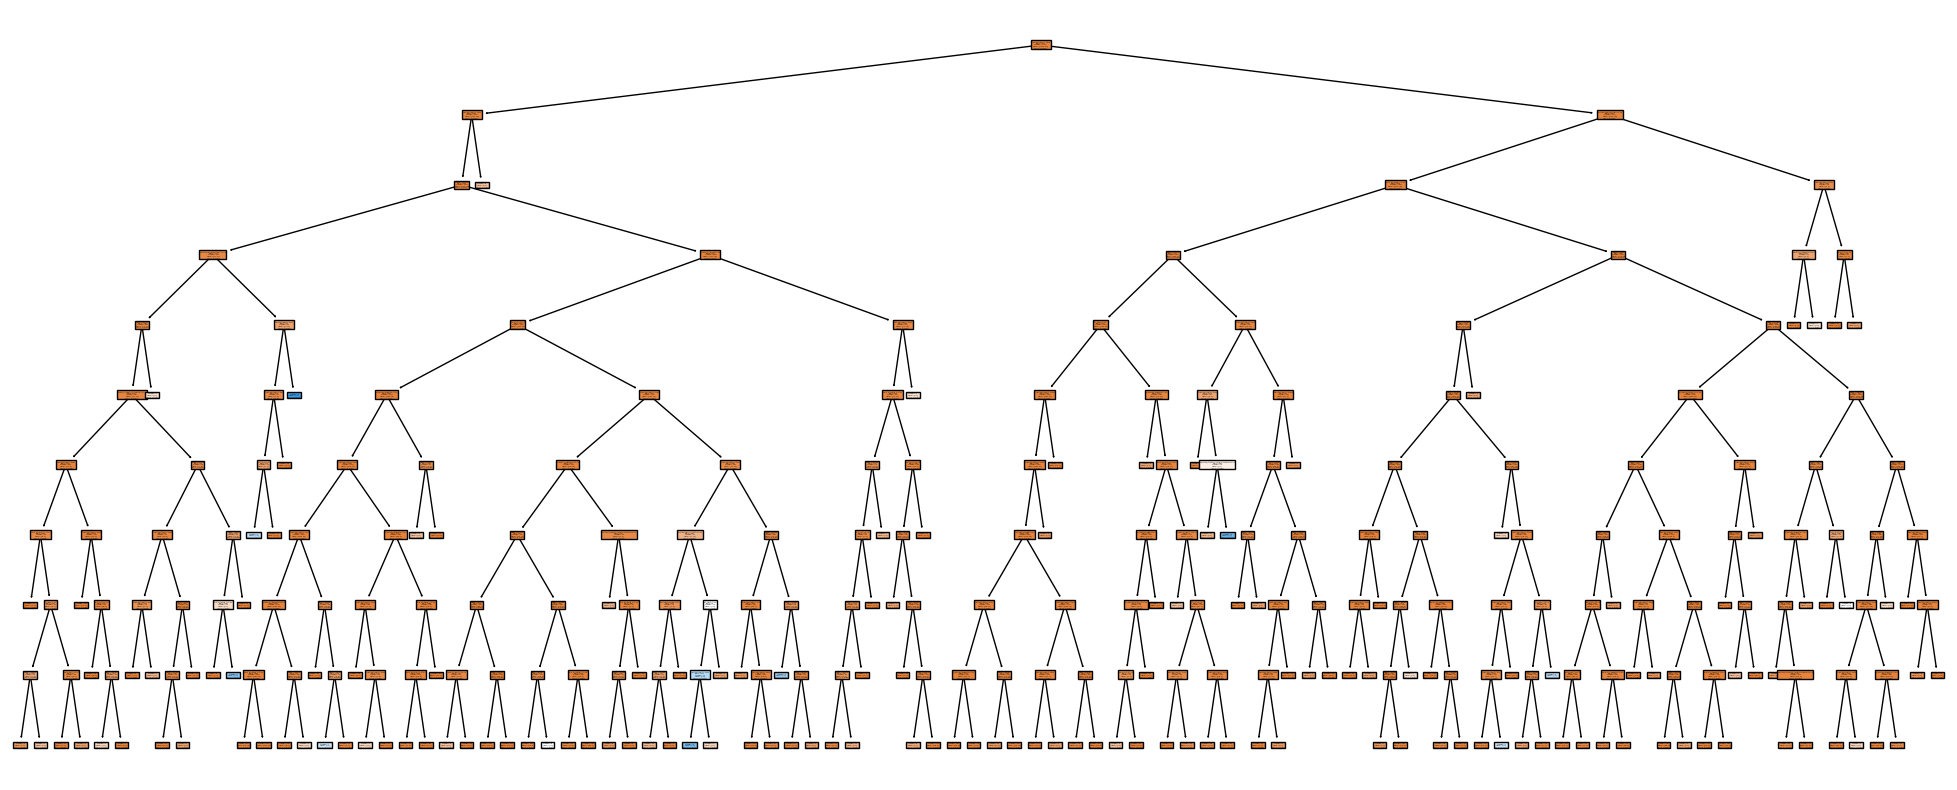

In [66]:
plt.figure(figsize=[25,10])
plot_tree(clf,
         filled=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=list(X_treino.columns));

In [77]:
proporcao_aprovados = (predict == 0).sum() / len(predict) *100
proporcao_aprovados


99.96567996567997

In [78]:
proporcao_reprovados = (predict == 1).sum() / len(predict) *100
proporcao_reprovados

0.03432003432003432

In [83]:
# 5)
base2 = pd.read_csv('vars_dummy.csv')

y2 = base2['mau']
y2.replace({True: 1, False: 1}, inplace=True)

X2 = base2.drop('mau', axis=1)
y2.value_counts()


mau
1    16650
Name: count, dtype: int64

In [88]:

X2_treino, X2_teste, y2_treino, y2_teste = train_test_split(X2, y2, test_size = 0.3, random_state=100)

In [89]:
clf2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf2.fit(X2_treino, y2_treino)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

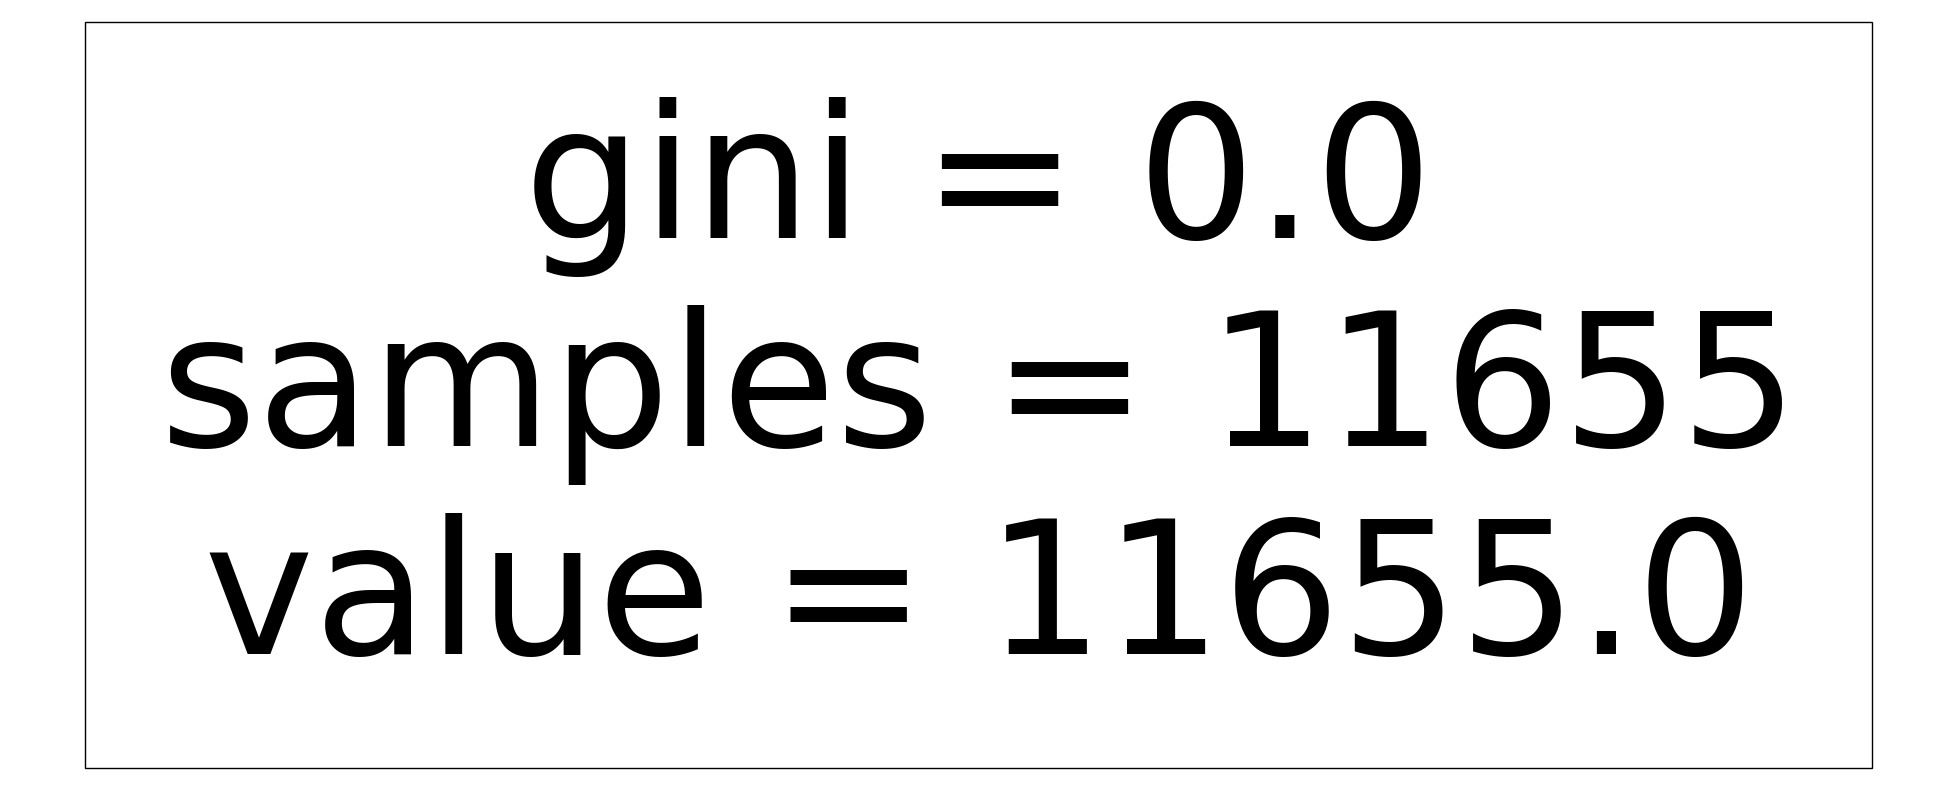

In [90]:
plt.figure(figsize=[25,10])
plot_tree(clf2,
         filled=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=list(X2_treino.columns));

In [91]:
predict2 = clf2.predict(X2_treino)
accuracy_score(y2_treino, predict2)

1.0